In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sn
import sklearn 
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import sys
import matplotlib
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DTSC 710 - Final Project/(Target)Heart_Disease_Prediction.csv") #AVI
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DTSC 710 - Final Project/(Target)Heart_Disease_Prediction.csv") # Binnu

In [ ]:
data.info()
#original dataset Heart Disease Presense, Absense has been changed to taret class in datset being used over here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Target                   270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.shape

(270, 14)

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
data.Target.replace(('Presence', 'Absence'), (1, 0), inplace=True)
#Chnaging Presense and Absense to 0 and 1

<function matplotlib.pyplot.show(*args, **kw)>

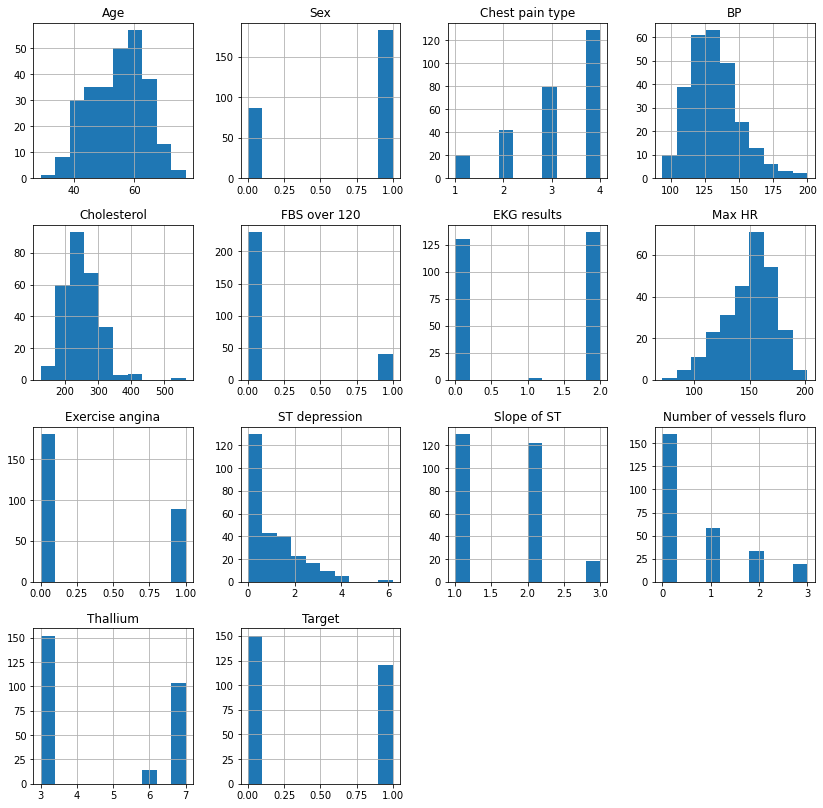

In [ ]:
data.hist(figsize =(14, 14))
plt.show

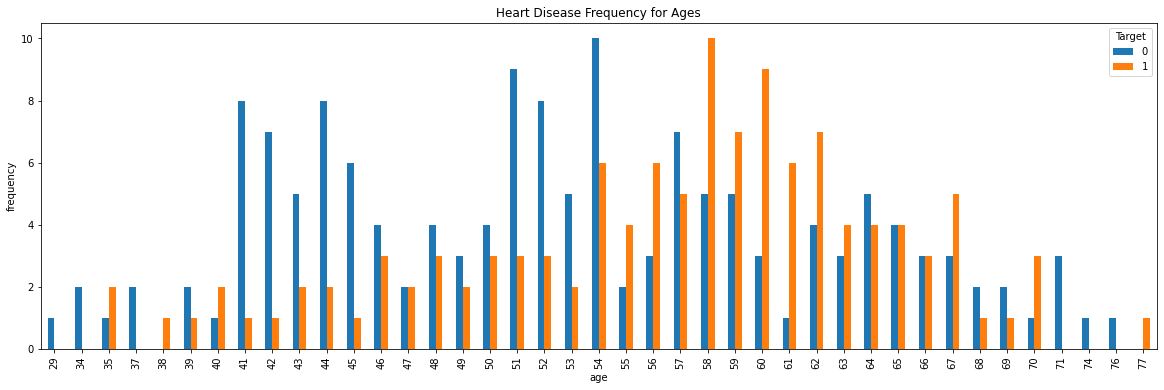

In [ ]:
pd.crosstab(data.Age, data.Target).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

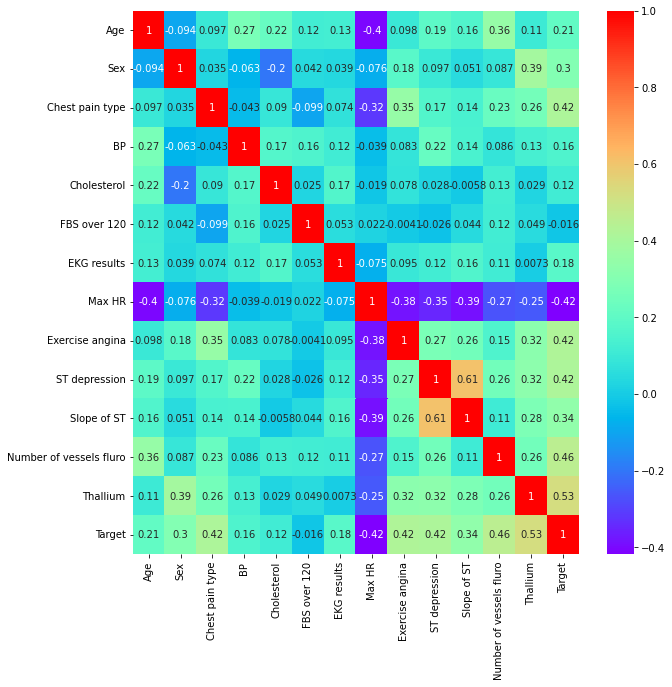

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(data.corr(),annot=True,cmap="rainbow")

In [ ]:
#Create Training and Testing Datasets
X = np.array(data.drop(['Target'],1))
y = np.array(data['Target'])

<ipython-input-16-6897016d398c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['Target'],1))


In [ ]:
X[0]

array([ 70. ,   1. ,   4. , 130. , 322. ,   0. ,   2. , 109. ,   0. ,
         2.4,   2. ,   3. ,   3. ])

In [ ]:
 # create X and Y datasets for training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=50, test_size = 0.2)

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical 

y_train = to_categorical(y_train, num_classes=None) 
y_test = to_categorical(y_test, num_classes=None) 

print (y_train.shape) 
print (y_train[:10])

(216, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Building and Training te Neuteral Network

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
22/22 [==============================] - 1s 15ms/step - loss: 0.7153 - accuracy: 0.5648 - val_loss: 0.7043 - val_accuracy: 0.5556
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7256 - accuracy: 0.5602 - val_loss: 0.7062 - val_accuracy: 0.5556
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.5509 - val_loss: 0.7014 - val_accuracy: 0.5556
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7146 - accuracy: 0.5556 - val_loss: 0.7051 - val_accuracy: 0.6667
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5833 - val_loss: 0.6940 - val_accuracy: 0.5741
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7097 - accuracy: 0.5509 - val_loss: 0.6872 - val_accuracy: 0.6481
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7140 - accuracy: 0.5417 - val_loss: 0.7116 - val_accuracy: 0.5556
Epoch 8/50
22/22 [=

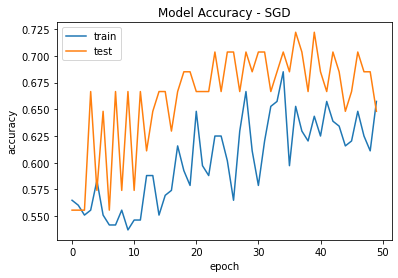

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - SGD')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

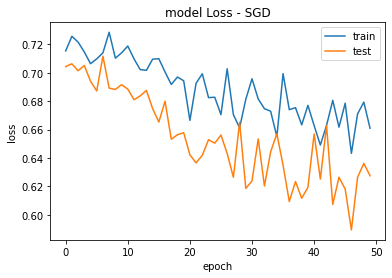

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss - SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1792      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
22/22 [==============================] - 1s 15ms/step - loss: 0.7092 - accuracy: 0.5417 - val_loss: 0.7075 - val_accuracy: 0.5926
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7152 - accuracy: 0.5000 - val_loss: 0.6790 - val_accuracy: 0.6667
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 0.7143 - accuracy: 0.5509 - val_loss: 0.6750 - val_accuracy: 0.6481
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7086 - accuracy: 0.5787 - val_loss: 0.6757 - val_accuracy: 0.5556
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5880 - val_loss: 0.6707 - val_accuracy: 0.6111
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7055 - accuracy: 0.5324 - val_loss: 0.6576 - val_accuracy: 0.7037
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.6019 - val_loss: 0.6349 - val_accuracy: 0.7037
Epoch 8/50
22/22 [=

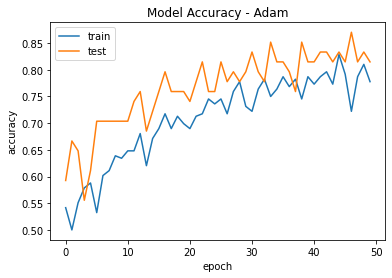

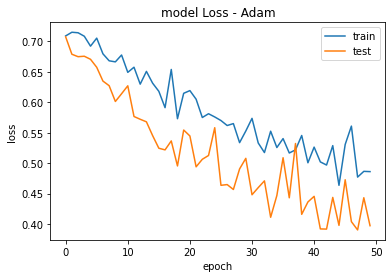

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss - Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1792      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                

In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
22/22 [==============================] - 1s 13ms/step - loss: 0.7710 - accuracy: 0.4630 - val_loss: 0.7222 - val_accuracy: 0.5556
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.7343 - accuracy: 0.4769 - val_loss: 0.7183 - val_accuracy: 0.5370
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7139 - accuracy: 0.5741 - val_loss: 0.7169 - val_accuracy: 0.5556
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7361 - accuracy: 0.5139 - val_loss: 0.7145 - val_accuracy: 0.5556
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7511 - accuracy: 0.4722 - val_loss: 0.7129 - val_accuracy: 0.5556
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.7234 - accuracy: 0.5231 - val_loss: 0.7112 - val_accuracy: 0.5556
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.7162 - accuracy: 0.5278 - val_loss: 0.7099 - val_accuracy: 0.5556
Epoch 8/50
22/22 [=

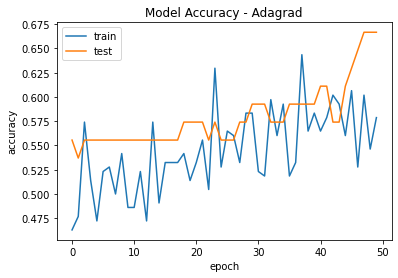

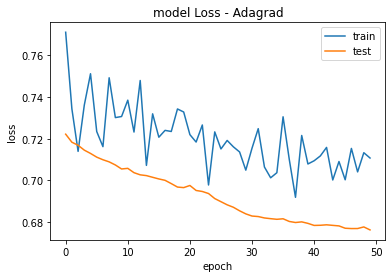

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Adagrad')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss - Adagrad')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='Ftrl', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1792      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                

In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50, batch_size=10)

Epoch 1/50
22/22 [==============================] - 1s 13ms/step - loss: 0.7008 - accuracy: 0.4861 - val_loss: 0.6930 - val_accuracy: 0.5556
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5463 - val_loss: 0.6928 - val_accuracy: 0.5556
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5556 - val_loss: 0.6927 - val_accuracy: 0.5556
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5556 - val_loss: 0.6925 - val_accuracy: 0.5556
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5556 - val_loss: 0.6925 - val_accuracy: 0.5556
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5556 - val_loss: 0.6924 - val_accuracy: 0.5556
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5556 - val_loss: 0.6923 - val_accuracy: 0.5556
Epoch 8/50
22/22 [=

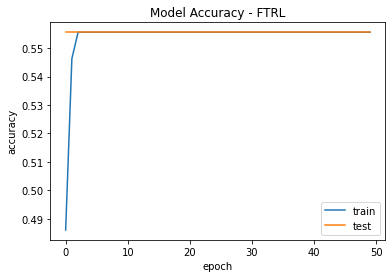

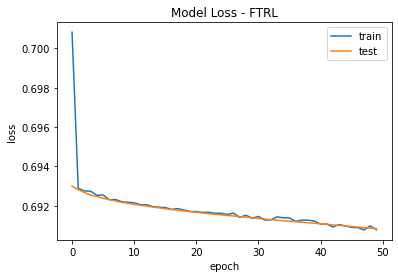

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - FTRL')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - FTRL')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()